In [1]:
import pandas as pd
mnist_data = pd.read_csv('./mnist.csv').values

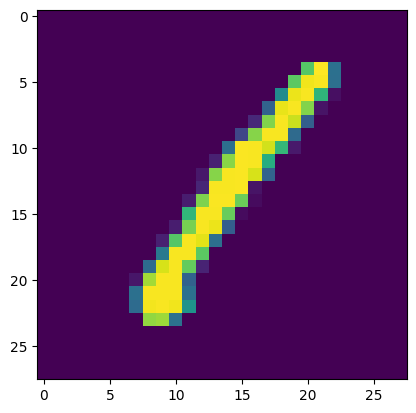

In [2]:
import matplotlib.pyplot as plt
labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28
plt.imshow(digits[0].reshape(img_size, img_size))
plt.show()

In [3]:
# create ink feature
import numpy as np
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [4]:
print(f"The ink mean : {ink_mean}")
print(f"The ink std.dev : {ink_std}")

The ink mean : [34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75]
The ink std.dev : [8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]


In [5]:
# The reshape is neccesary to call LogisticRegression() with a single feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)